In [16]:
import importlib
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [17]:
# os.chdir(os.getcwd() + '/src/')
# os.getcwd()
import utils as utils
import gmm as GMM

In [20]:
test_rng: np.random.Generator = np.random.default_rng(0)
k = 2
dim = 2

def reload():
    importlib.reload(GMM)
    importlib.reload(utils)

[[4.21459465 3.68580679]
 [4.84104223 3.51909655]]


<AxesSubplot:>

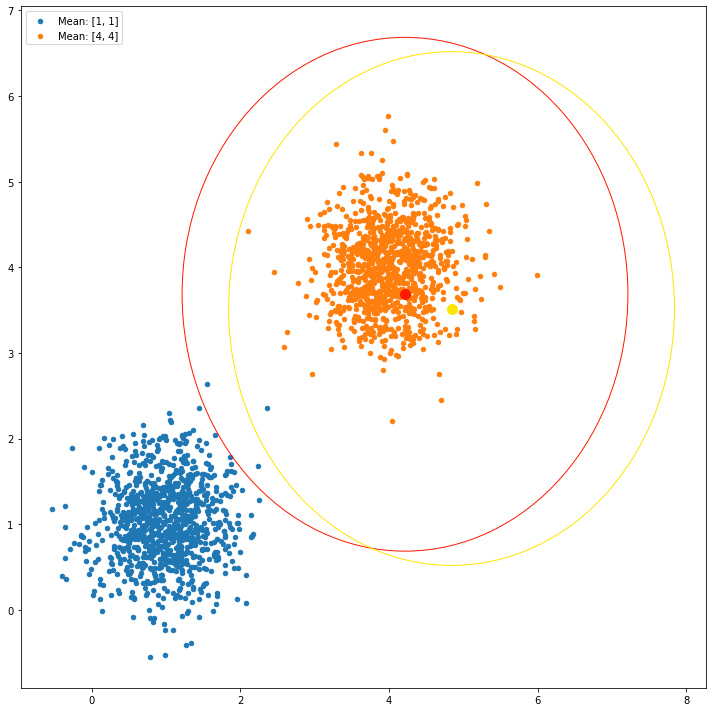

In [21]:
cluster_means = [
    [1, 1],
    [4, 4],
]
initial_data, fig, ax = utils.generate_clustered_data(dim, k, cluster_means, num_points_per_cluster=1000, plot=True, spread_factor=0.05)
shuffle_data = test_rng.permutation(initial_data)
gmm_init_data = shuffle_data[:k]
print(gmm_init_data)
gmm = GMM.GMM(0, 2)
gmm.initialize(gmm_init_data)
utils.plot_gaussians(gmm.means, gmm.covariances, ax)

In [7]:
gmm.log_likelihood(shuffle_data)

-5778.948567197453

In [8]:
nb_iter = 10
batch_size = 100
for i in range(nb_iter):
    print(f'Current ll {gmm.log_likelihood(shuffle_data)}.')
    samples = shuffle_data[test_rng.choice(len(shuffle_data), size=batch_size)]
    print(f'Coefficients are {gmm.coefficients}; Means are {gmm.means}')
    print(f'Maxima in covs are {[np.max(c) for c in gmm.covariances]}')
    samples = shuffle_data[test_rng.choice(len(shuffle_data), size=batch_size)]
    before = gmm.log_likelihood(samples)
    gmm.online_EM(samples, gamma=0.01)
    after = gmm.log_likelihood(samples)
    print(f'--------- ll shifted from {before} to {after} ----------')

Current ll -5778.948567197453.
Coefficients are [0.5 0.5]; Means are [[3.41578027 3.77181582]
 [1.01084703 0.54976185]]
Maxima in covs are [1.0, 1.0]
--------- ll shifted from -289.52477901503096 to -222.94719417626735 ----------
Current ll -4526.78699596269.
Coefficients are [0.49222922 0.50777078]; Means are [[3.75144096 3.95704917]
 [1.07300373 0.88109476]]
Maxima in covs are [0.3968051483919964, 0.3410121534938241]
--------- ll shifted from -228.9774787722774 to -202.89283812351408 ----------
Current ll -4152.034226080097.
Coefficients are [0.47894638 0.52105362]; Means are [[3.87603759 4.0181379 ]
 [0.92394142 0.91272426]]
Maxima in covs are [0.2712826558595549, 0.31017036349589616]
--------- ll shifted from -199.7658475974588 to -191.52399299830515 ----------
Current ll -4038.7413836969117.
Coefficients are [0.47159681 0.52840319]; Means are [[3.89902626 4.03743447]
 [0.91972912 0.92456067]]
Maxima in covs are [0.2444701167111468, 0.23586899693393926]
--------- ll shifted from -2

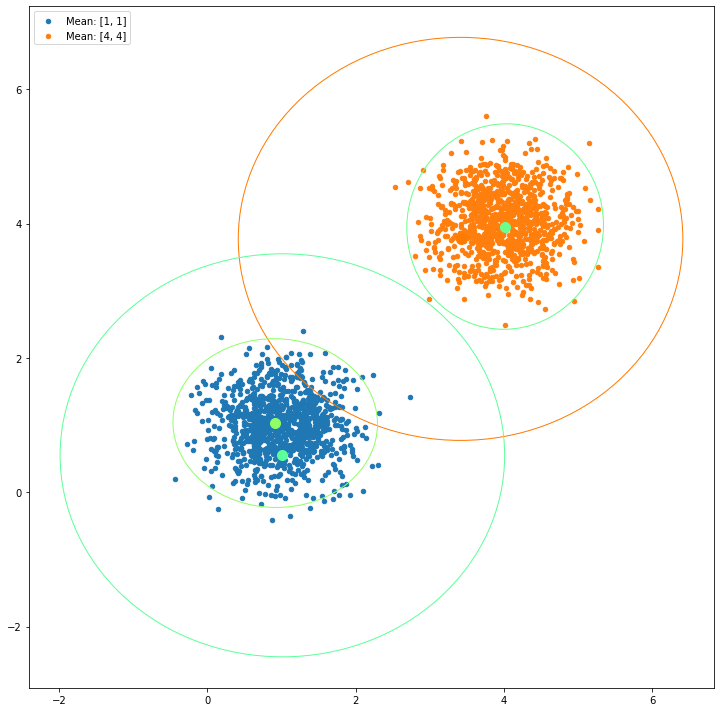

In [9]:
utils.plot_gaussians(gmm.means, gmm.covariances, ax)
fig